In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-approval-prediction-a-classification-problem/Automatic_Loan_approval_prediction_trainingData.csv
/kaggle/input/loan-approval-prediction-a-classification-problem/Automatic_Loan_approval_prediction_testData.csv
/kaggle/input/loan-approval-prediction-a-classification-problem/Automatic_Loan_approval_prediction_sample_submission.csv


### 1. Reading training and testing datasets

In [74]:
df_train = pd.read_csv(r'../input/loan-approval-prediction-a-classification-problem/Automatic_Loan_approval_prediction_trainingData.csv')

In [75]:
df_test = pd.read_csv(r'../input/loan-approval-prediction-a-classification-problem/Automatic_Loan_approval_prediction_testData.csv')
df_submission = pd.read_csv(r'../input/loan-approval-prediction-a-classification-problem/Automatic_Loan_approval_prediction_sample_submission.csv')

1. Without smote
2. with smote

## DATA explaoration and pre-processing

#### Importing few more libraries for EDA(Exploratory data analysis)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Possible hypothesis generation to either accept or reject the generated results: 
Applicant income: Higher the salary, higher the chances for the loan to be approved
* Loan amount: lesser the amount, higher chances of approval
* Loan amount_term: loan for less time period have higher chances to be accepted

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         591 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [79]:
df_train.Credit_History.value_counts()
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            366 non-null    object 
 1   Gender             355 non-null    object 
 2   Married            366 non-null    object 
 3   Dependents         356 non-null    object 
 4   Education          366 non-null    object 
 5   Self_Employed      343 non-null    object 
 6   ApplicantIncome    366 non-null    int64  
 7   CoapplicantIncome  366 non-null    int64  
 8   LoanAmount         361 non-null    float64
 9   Loan_Amount_Term   360 non-null    float64
 10  Credit_History     337 non-null    float64
 11  Property_Area      366 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.4+ KB


#### * As there are some null values in the training as well tessting data set. Therefore,  we will remove the null values from the data and also check if there are any duplicates in the individual data set or any chance of data leakage in the dataset. 

In [81]:
df_train.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
df_train = df_train.dropna(how = 'any', axis='rows')

In [83]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [85]:
df_test = df_test.dropna(how='any', axis='rows')

In [86]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##### We have removed the null values present in the training and testing datasets

In [87]:
# Checking for duplicates in the training dataset

duplicate = df_train[df_train.duplicated()]
duplicate

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [88]:
# Checking for duplicates in the testing dataset

duplicate = df_test[df_test.duplicated()]
duplicate

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


##### No duplicate values are present in both training and testing dataset

### Checking for data leakage amongst training and testing dataset: **why dataleakage is important to be removed??? **

In [89]:
# df1  = pd.merge(df_train, df_test, how="inner",on= "Loan_ID")
# df1

How Inner join works in pandas dataframe? 

with help of venn diagram..
HOw it helped in identifying 0 data leakage between training and testing dataset

One of the approach: If there is data leakage in the training and testing dataset, then do the following; 
1. Concate both the dataset and drop duplicates(OR find intersection between the two)
2. remove the intersection data from original training dataset
3. similarly, remove the intersection data from the original testing dataset

## Data Preprocessing

In [90]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [91]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


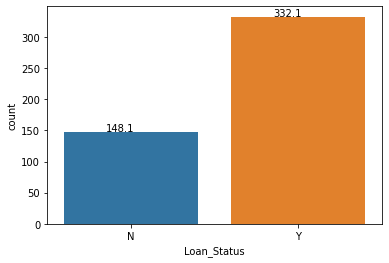

*********************
Y    332
N    148
Name: Loan_Status, dtype: int64


In [92]:
g = sns.countplot(df_train['Loan_Status'])

for p in g.patches:
    g.annotate('{:.1f}'.format(p.get_height()+0.1), (p.get_x()+0.25, p.get_height()+0.1))

plt.show()
print('*********************')
print(df_train['Loan_Status'].value_counts())

In [93]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

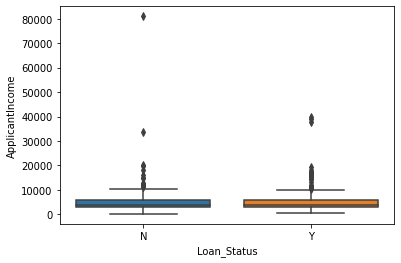

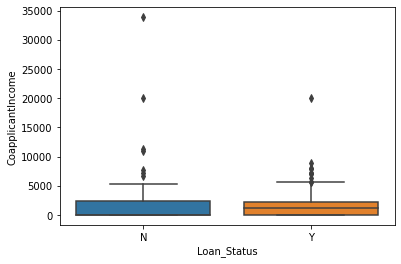

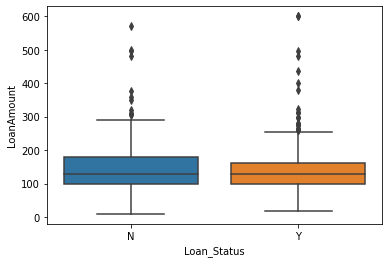

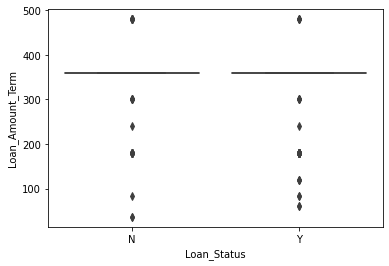

In [95]:
# For numerical datasets

for col in num_columns:
    plt.figure()
    plt.tight_layout()
    sns.boxplot(x = 'Loan_Status', y = df_train[col], data = df_train)

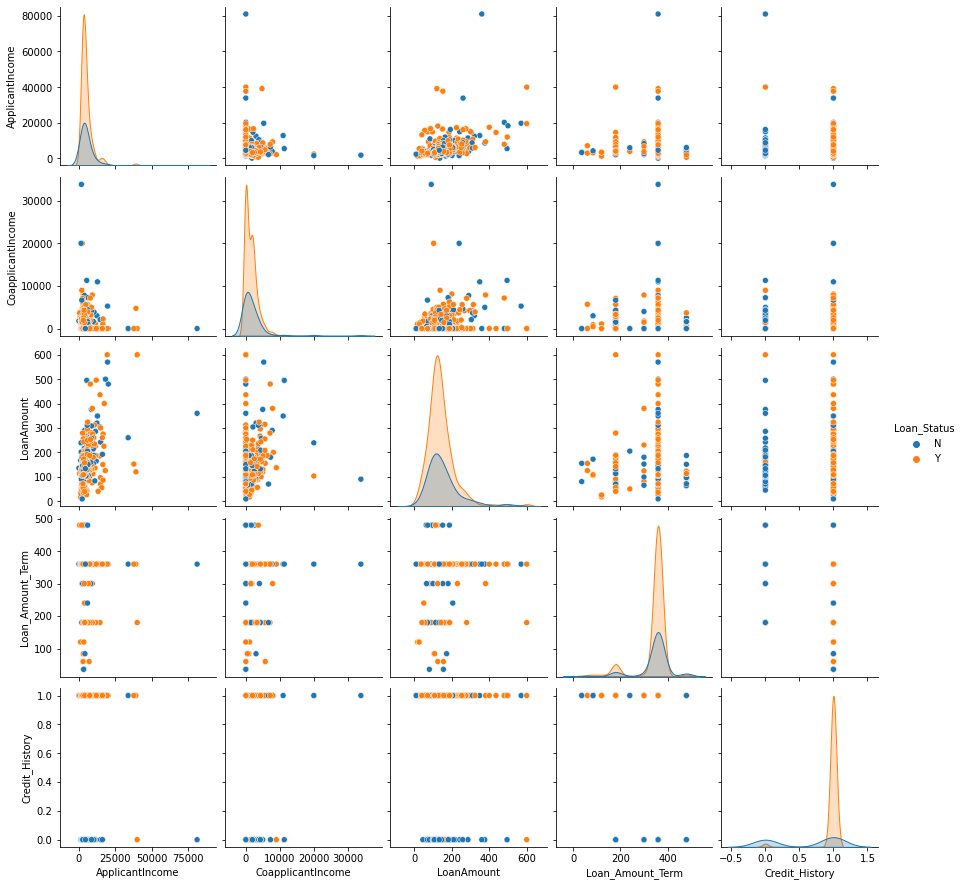

In [96]:
sns.pairplot(df_train, hue='Loan_Status', kind = 'scatter',diag_kind='kde')

<AxesSubplot:>

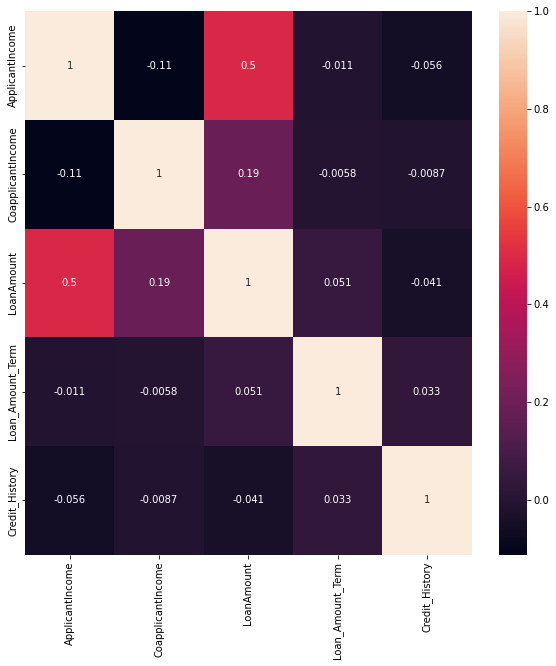

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot = True)

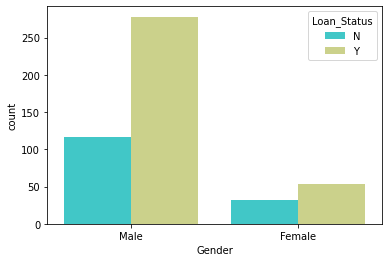

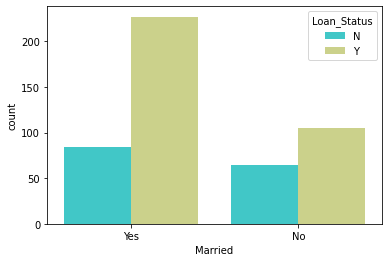

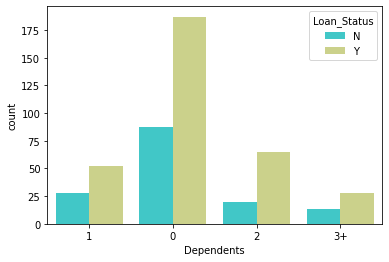

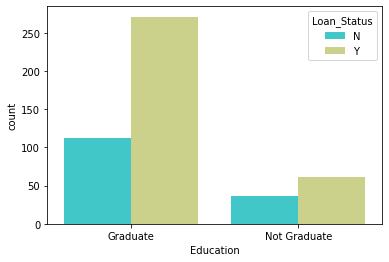

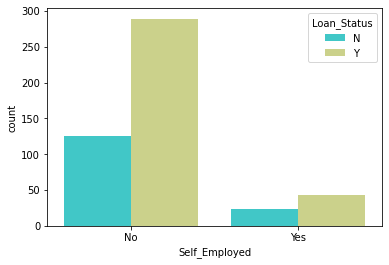

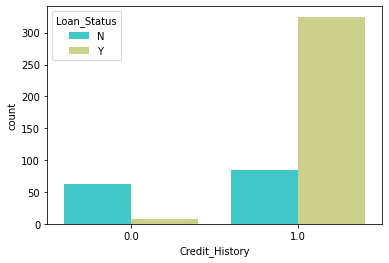

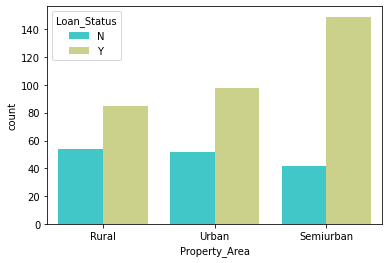

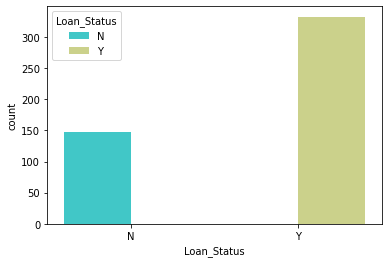

In [98]:
import math
# plot_per_row = 2
# i,j = 0,0
# fig,axs = plt.subplots(math.ceil(len(cat_columns)/plot_per_row), plot_per_row, figsize = (20,20))

for col in cat_columns:
    plt.figure()
    plt.tight_layout()
    sns.countplot(data=df_train, x=df_train[col], hue= 'Loan_Status',palette='rainbow')
    
#     axs[i][j].bar(df_train['Loan_Status'], df_train[col], s=3)
#     axs[i][j].set_ylabel(col)
#     j+=1
#     if j%plot_per_row ==0:
#         i+=1
#         j=0
plt.show()
# for x in cat_columns:
#     sns.countplot(data=df_train, x=x, hue='Loan_Status')

In [99]:
#  to find the corelation factor between categorical and target variable 
# (There are 2 methods to calculate that: 1. dython library using association and 2. using chi square test)

# !pip install dython

In [100]:
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

# associations(df_train, nominal_columns=cat_columns, numerical_columns=num_columns, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

/opt/conda/lib/python3.7/site-packages/dython/nominal.py:151: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  RuntimeWarning,


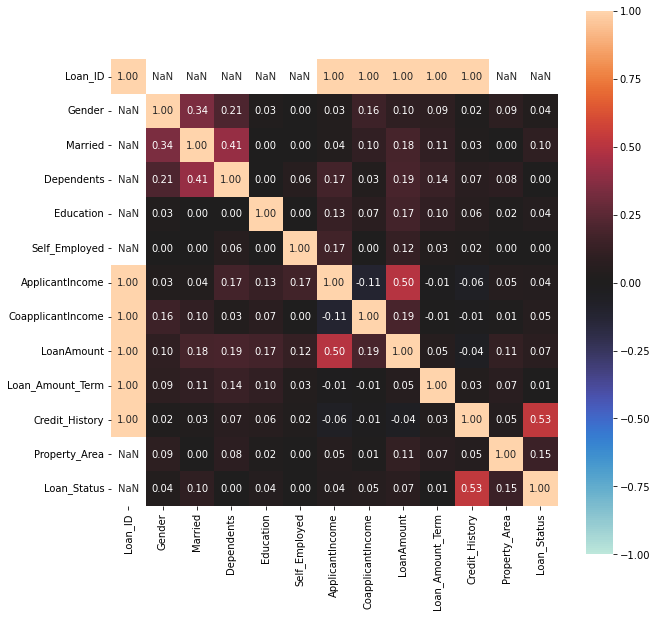

In [101]:
complete_correlation= associations(df_train, figsize=(10,10))

### Encoding categorical features

#### As there are two type of datatypes in the training dataset i.e. Categorical and Numerical type. 

We can analyze the categorical type by encoding the features. 
and for the 

In [102]:
#  Combining the applicant income and coapplicant income as total income

df_train['Total income'] = df_train['ApplicantIncome']+df_train['CoapplicantIncome']
df_train = df_train.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [103]:
df_train = df_train.drop(columns = ['Loan_ID'])

In [104]:
df_train_encoded = pd.get_dummies(df_train, drop_first=True)

df_train_encoded

,LoanAmount,Loan_Amount_Term,Credit_History,Total income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0
2,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1,1
3,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1,1
4,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1,1
5,267.0,360.0,1.0,9613.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,71.0,360.0,1.0,2900.0,0,0,0,0,0,0,0,0,0,1
609,40.0,180.0,1.0,4106.0,1,1,0,0,1,0,0,0,0,1
610,253.0,360.0,1.0,8312.0,1,1,1,0,0,0,0,0,1,1
611,187.0,360.0,1.0,7583.0,1,1,0,1,0,0,0,0,1,1


In [26]:
# ############### Handling/Imputing Missing values #############
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(strategy='mean')
# imp_train = imp.fit(X_train)
# X_train = imp_train.transform(X_train)
# X_test_imp = imp_train.transform(X_test)

## Oversampling the training dataset

In [106]:
#  Split train and val set 

X = df_train_encoded.drop(columns = ['Loan_Status_Y'])
y = df_train_encoded['Loan_Status_Y']

In [28]:
import collections
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 2)

#  bfit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
print(x_smote.shape)
print(y_smote.shape)

Original dataset shape Counter({1: 332, 0: 148})
Resample dataset shape Counter({0: 332, 1: 332})
(664, 13)
(664,)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


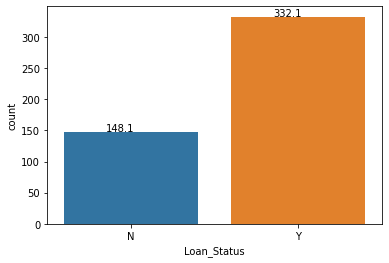

*********************
Y    332
N    148
Name: Loan_Status, dtype: int64


In [29]:
g = sns.countplot(df_train['Loan_Status'])

for p in g.patches:
    g.annotate('{:.1f}'.format(p.get_height()+0.1), (p.get_x()+0.25, p.get_height()+0.1))

plt.show()
print('*********************')
print(df_train['Loan_Status'].value_counts())

### Splitting the dataset

In [107]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state =42)

In [108]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(384, 13)
(384,)
(96, 13)
(96,)


## Model Building


#### Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict


for th in np.arange(0.1,0.9,0.1):
    log_clf = LogisticRegression()

#### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve

tree_clf = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=13,
    random_state=123,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0)

tree_clf.fit(X_train,y_train)

y_pred = tree_clf.predict(X_test)

In [111]:
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8229166666666666
Training Data F1 Score  0.8759124087591241
Validation Mean F1 Score:  0.6919648606714637
Validation Mean Accuracy:  0.7523581681476419


The model is overfitting

As training accuracy > testing accuracy with default setting of decision tree classifier. Hence. model is overfitting.

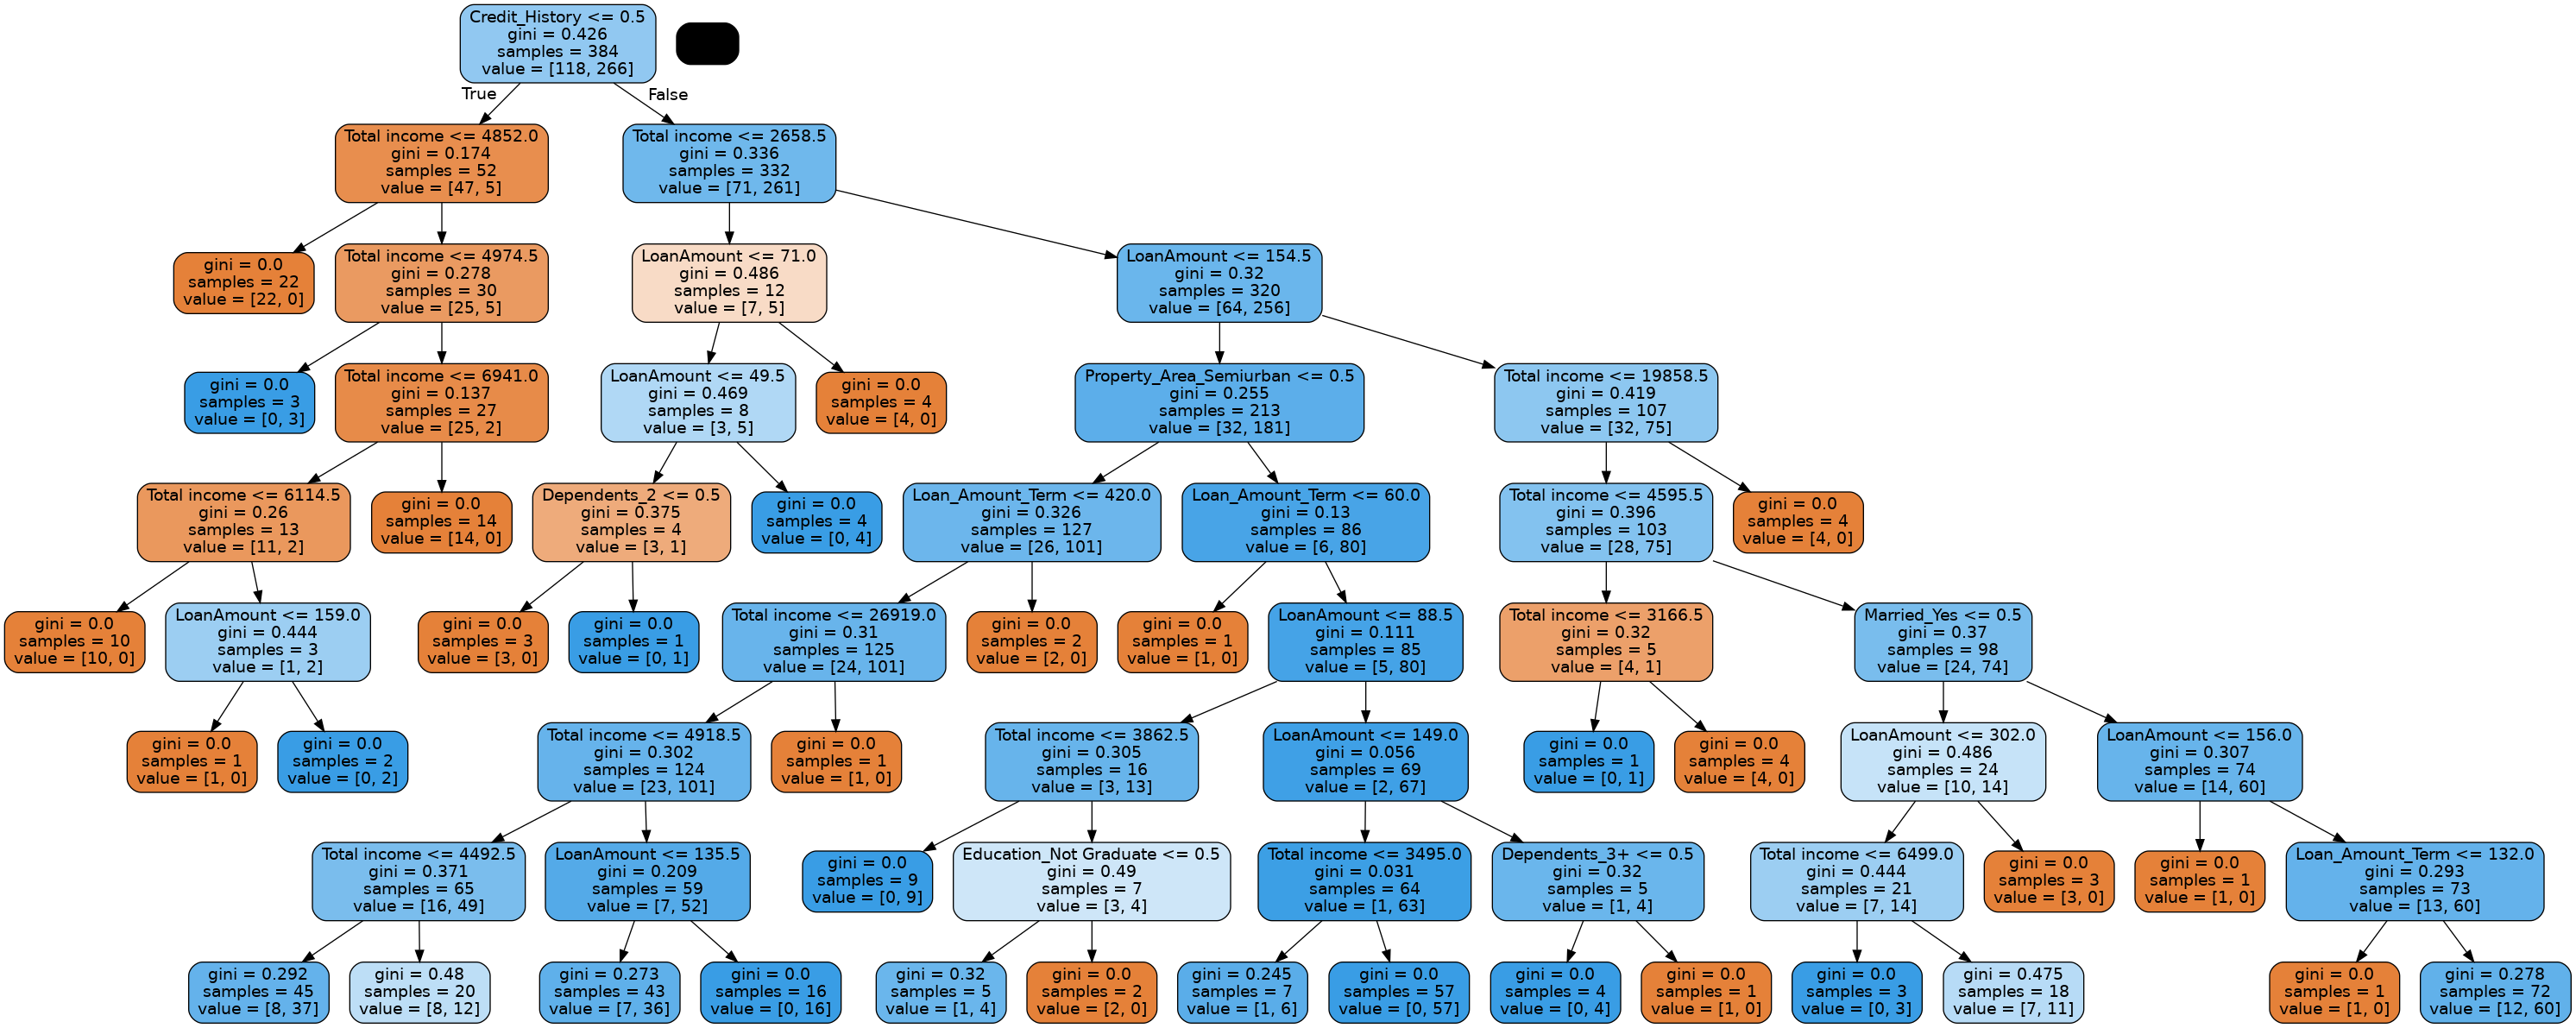

In [112]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz

import pydot 

features = list(X.columns[:])
features

dot_data = StringIO()  
export_graphviz(tree_clf, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [113]:
print(confusion_matrix(y_test, y_pred))
print( '\n')
print(classification_report(y_test, y_pred))

print('Mean Squared Error:',mean_squared_error(y_test, y_pred))

print('train score', tree_clf.score(X_train, y_train))

print('test score', tree_clf.score(X_test, y_test))

# print('ROC-AUC score', roc_auc_score(y_test, ytree_pred_prob, multi_class='ovo'))

[[19 11]
 [ 6 60]]


              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.85      0.91      0.88        66

    accuracy                           0.82        96
   macro avg       0.80      0.77      0.78        96
weighted avg       0.82      0.82      0.82        96

Mean Squared Error: 0.17708333333333334
train score 0.8854166666666666
test score 0.8229166666666666


In [114]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16.052083333333332
Mean Squared Error: 0.17708333333333334
Root Mean Squared Error: 0.4208127057650866


In [115]:
train_pred_y = tree_clf.predict(X_train)
test_pred_y = tree_clf.predict(X_test)


print(f"train_MSE_DT = {mean_squared_error(y_train, train_pred_y)}")
print(f"ttest_MSE_DT = {mean_squared_error(y_test, test_pred_y)}")

train_MSE_DT = 0.11458333333333333
ttest_MSE_DT = 0.17708333333333334


In [116]:
## Calculating feature importance

feat_importance = tree_clf.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, tree_clf.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature Importance'], ascending=False)

,Feature Importance
Credit_History,0.440718
Total income,0.266515
LoanAmount,0.144896
Loan_Amount_Term,0.058592
Married_Yes,0.019309
Property_Area_Semiurban,0.019230
Education_Not Graduate,0.018825
Dependents_3+,0.016472
Dependents_2,0.015443
Gender_Male,0.000000


#### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve


rf = RandomForestClassifier(n_estimators=100, criterion= 'gini', random_state= 42, bootstrap= True, max_features=13, max_depth=8)

rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)

In [118]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfpred)))

Mean Absolute Error: 10.739583333333334
Mean Squared Error: 0.15625
Root Mean Squared Error: 0.39528470752104744


In [119]:
#Cross validation
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(rf, X, y, cv=10)

print('The accuracy after cross validation is: ',sum(accuracy)/len(accuracy)*100,'%')
print( '\'')

print(confusion_matrix(y_test, rfpred))
print( '\'')
print(classification_report(y_test, rfpred))

print('Mean Square Error:',mean_squared_error(y_test, rfpred))

print('Train score', rf.score(X_train, y_train))
print('Test score', rf.score(X_test, y_test))
# print('ROC-AUC score', roc_auc_score(y_test, rfpred_prob, multi_class='ovr'))

The accuracy after cross validation is:  79.79166666666666 %
'
[[19 11]
 [ 4 62]]
'
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.85      0.94      0.89        66

    accuracy                           0.84        96
   macro avg       0.84      0.79      0.80        96
weighted avg       0.84      0.84      0.84        96

Mean Square Error: 0.15625
Train score 0.8932291666666666
Test score 0.84375


## Emsembling

#### For DT

In [120]:
#Importing BAgging Classifier 
from sklearn.ensemble import BaggingClassifier

#creating an BAgging instance
clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, 
                       random_state=900, bootstrap=True, 
                        max_features=13, bootstrap_features=True)
    
#training the model
clf.fit(X_train,y_train)

#calculating score on training data
print('training score' , clf.score(X_train,y_train))

#calculating score on test data
print('Test score' , clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

training score 0.9010416666666666
Test score 0.84375


In [121]:
from sklearn.metrics import mean_squared_error
print(confusion_matrix(y_test, y_pred))
print( '\'')

print(classification_report(y_test, y_pred))
# print(mean_squared_error(y_test, y_pred))

print('Training score' , clf.score(X_train,y_train))

print('Test score' , clf.score(X_test, y_test))

# print('ROC-AUC score', roc_auc_score(y_test, y_pred_prob, multi_class='ovo'))

[[19 11]
 [ 4 62]]
'
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.85      0.94      0.89        66

    accuracy                           0.84        96
   macro avg       0.84      0.79      0.80        96
weighted avg       0.84      0.84      0.84        96

Training score 0.9010416666666666
Test score 0.84375


#### For RF

In [122]:
#Importing AdaBoost Classifier 
from sklearn.ensemble import AdaBoostClassifier

#Creating an AdaBoost instance
clf = AdaBoostClassifier(random_state=89, base_estimator=rf, n_estimators=100, learning_rate=0.01)

#training the model
clf.fit(X_train,y_train)

#calculating score on training data
print('training score', clf.score(X_train,y_train))

#calculating score on test data
print('Test score', clf.score(X_test, y_test))

training score 0.921875
Test score 0.84375


In [123]:
#Importing Bagging Classifier 
from sklearn.ensemble import BaggingClassifier

#creating an Bagging instance
clf1 = BaggingClassifier(base_estimator=rf, n_estimators=100, random_state=43
                         , bootstrap=True, max_features=13, bootstrap_features=True)  

#training the model
clf1.fit(X_train,y_train)

RFpred_train=clf1.predict(X_train)

RFpred_test=clf1.predict(X_test)

RFpred_proba = rf.predict_proba(X_test)

#calculating score on training data
print('training score' , clf1.score(X_train, y_train))

#calculating score on test data
print('Test score' , clf1.score(X_test, y_test))

training score 0.8776041666666666
Test score 0.84375


In [124]:
from sklearn.metrics import mean_squared_error
print(confusion_matrix(y_test, RFpred_test))
print( '\'')

print(classification_report(y_test, RFpred_test))
# print(mean_squared_error(y_test, y_pred))

print('Training score' , clf1.score(X_train,y_train))

print('Test score' , clf1.score(X_test, y_test))
# print('ROC-AUC score', roc_auc_score(y_test, RFpred_proba, multi_class='ovr'))

[[17 13]
 [ 2 64]]
'
              precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96

Training score 0.8776041666666666
Test score 0.84375


#### Grid search for RF

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [30, 50, 75, 100, 150,180], 
    "max_depth": [5, 7, 8, 11, 13, 15], 
    "max_features" :[5, 7,10,12,14]
    }
rf_ensemble = RandomForestClassifier()
rf_ensemble_tune = GridSearchCV(estimator = rf_ensemble, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 2)

rf_ensemble_tune.fit(X_train, y_train)
rf_ensemble_tune.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END .......max_depth=5, max_features=5, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=30; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n_estimators=75; total time=   0.1s
[CV] END .......max_depth=5, max_features=5, n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/p

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=50)

#### The best parameter through gris search are found to be following:
##### RandomForestClassifier(max_depth=8, max_features=12)
RandomForestClassifier(max_depth=5, max_features=7, n_estimators=30)
### Now, retraining the model with the best parameters

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve


rf_ensembled = RandomForestClassifier(n_estimators=100, criterion= 'gini', random_state= 89, bootstrap= True, max_features=7, max_depth=5)

rf_ensembled.fit(X_train, y_train)
rfpred_ensembled = rf_ensembled.predict(X_test)

In [127]:
#Cross validation
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(rf_ensembled, X, y, cv=10)

print('The accuracy after cross validation is: ',sum(accuracy)/len(accuracy)*100,'%')
print( '\'')

print(confusion_matrix(y_test, rfpred_ensembled))
print( '\'')
print(classification_report(y_test, rfpred_ensembled))

print('Mean Square Error:',mean_squared_error(y_test, rfpred_ensembled))

print('Train score', rf_ensembled.score(X_train, y_train))
print('Test score', rf_ensembled.score(X_test, y_test))
# print('ROC-AUC score', roc_auc_score(y_test, rfpred_prob, multi_class='ovr'))

The accuracy after cross validation is:  80.20833333333334 %
'
[[18 12]
 [ 2 64]]
'
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        30
           1       0.84      0.97      0.90        66

    accuracy                           0.85        96
   macro avg       0.87      0.78      0.81        96
weighted avg       0.86      0.85      0.84        96

Mean Square Error: 0.14583333333333334
Train score 0.8619791666666666
Test score 0.8541666666666666


#### Grid search and Bagging classifier, both the models are giving same accuracy. Thus, going ahead, we will validate the model on test data

#### Adding the feature of total income from Applicant and co-applicant income

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
361,LP002969,N
362,LP002971,N
363,LP002975,N
364,LP002980,N


In [131]:
df_test['Total income'] = df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_test_loan = pd.DataFrame()
df_test_loan['Loan_ID'] = df_test['Loan_ID']

In [132]:
df_test = df_test.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis = 1)
df_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income
0,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800
4,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,3276
5,Male,Yes,0,Not Graduate,Yes,152.0,360.0,1.0,Urban,5587
...,...,...,...,...,...,...,...,...,...,...
359,Male,No,0,Graduate,No,152.0,360.0,1.0,Semiurban,6667
361,Male,Yes,1,Graduate,No,99.0,360.0,1.0,Semiurban,4436
362,Male,Yes,3+,Not Graduate,Yes,113.0,360.0,1.0,Urban,5786
363,Male,Yes,0,Graduate,No,115.0,360.0,1.0,Urban,4867


#### Encoding the categorical features in the testing dataset

In [133]:
df_test_encoded = pd.get_dummies(df_test, drop_first=True)
df_test_encoded

,LoanAmount,Loan_Amount_Term,Credit_History,Total income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,110.0,360.0,1.0,5720,1,1,0,0,0,0,0,0,1
1,126.0,360.0,1.0,4576,1,1,1,0,0,0,0,0,1
2,208.0,360.0,1.0,6800,1,1,0,1,0,0,0,0,1
4,78.0,360.0,1.0,3276,1,0,0,0,0,1,0,0,1
5,152.0,360.0,1.0,5587,1,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,152.0,360.0,1.0,6667,1,0,0,0,0,0,0,1,0
361,99.0,360.0,1.0,4436,1,1,1,0,0,0,0,1,0
362,113.0,360.0,1.0,5786,1,1,0,0,1,1,1,0,1
363,115.0,360.0,1.0,4867,1,1,0,0,0,0,0,0,1


In [134]:
rf_ensembled_test_pred = rf_ensembled.predict(df_test_encoded)

In [141]:
submission = pd.DataFrame()
submission['Id']= df_test_loan['Loan_ID']
submission['SalePrice'] = rf_ensembled_test_pred

In [142]:
submission.to_csv('Submission_loanpredictio.csv', index=False)